### 공공데이터 open data

* 공공데이터란, 
  - 공공기관에서 업무를 수행하면서 만들었거나, 관리하고 있는 다양한 형태의 데이터 중에 외부에 공개된 데이터
  - 공공데이터의 제공 및 이용 활성화에 관한 법률(약칭 공공데이터법) [링크](https://www.law.go.kr/%EB%B2%95%EB%A0%B9/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98%EC%A0%9C%EA%B3%B5%EB%B0%8F%EC%9D%B4%EC%9A%A9%ED%99%9C%EC%84%B1%ED%99%94%EC%97%90%EA%B4%80%ED%95%9C%EB%B2%95%EB%A5%A0)


* 공공데이터 제공 사이트
  - 공공데이터 포털 : https://www.data.go.kr/
  - 국가통계포털 : https://kosis.kr/index/index.do
  - 기상 자료 개방 포털 : https://data.kma.go.kr/cmmn/main.do
  - 국가 공간정보 포털 : http://www.nsdi.go.kr/lxportal/?menuno=2679
  - 문화 공공데이터 : https://www.culture.go.kr/data/main/main.do


* 공공데이터 활용사례 
  - 공공데이터 포털 제공 사례 [링크](https://www.data.go.kr/tcs/puc/selectPublicUseCaseListView.do)
  - 행정안전부, 공공부문 데이터 분석활용 우수사례집, 2021 [링크](https://www.mois.go.kr/frt/bbs/type001/commonSelectBoardArticle.do;jsessionid=zaIDgnwA2y6Wy3xH9Po0sS8h.node10?bbsId=BBSMSTR_000000000015&nttId=89544#none)
  - 문화데이터 활용 사례 [링크](https://www.culture.go.kr/data/application/info.do)
  - 농림축산식품 공공데이터 포털 데이터 활용 사례 [링크](https://data.mafra.go.kr/prcuse/indexPrcuseServiceList.do)

### 샘플 문제 (1)

* 문제 : 우리나라의 행정구역별 인구수는 얼마나 될까?

1. 데이터 수집
  - 행정구역(시군구)별, 성별 인구수
  - 가장 최근 인구수 데이터를 시군구 지역까지 가져오기
  - 국가통계포털 : https://kosis.kr/index/index.do
    - 조회설정 > 행정구역(시군구)별을 2레벨까지, 시점을 가장 최근 시점으로 선택
    - 다운로드 > csv


2. 데이터 전처리
  - 각 행에 시도와 군구 정보가 모두 포함되도록 새로운 열을 추가하기
  - 필요 없는 행 삭제 및 첫번째 열 정보 수정
  - 노트북 파일이 있는 곳과 동일한 폴더에 csv로 저장


3. csv 데이터를 DataFrame 으로 가져오기


* 판다스(Pandas)
  - 데이터 처리와 분석을 위한 라이브러리
  - 행과 열로 이루어진 데이터 객체를 만들 수 있음
  - 1차원 데이터 구조 : Series
  - 2차원 데이터 구조 : DataFrame
  - 3차원 데이터 구조 : Panel

In [177]:
import pandas as pd
pd.__version__

'1.4.2'

In [178]:
# csv 파일을 DataFrame 으로 가져오기
popul = pd.read_csv('./population_20220726.csv', encoding='cp949', engine='python')

# 상위 5개 데이터 확인
# popul.head()

# 전체 데이터 확인
# display(popul)

# 각 컬럼별 데이터타입 확인
# popul.dtypes

# 내가 사는 지역의 인구수 확인
# popul.loc[(popul['군구'] == '노원구')]

In [179]:
# 지수표현식 대신 실수표현식으로 표시 옵션
pd.options.display.float_format = '{:.5f}'.format
# 실수표현식 대신 지수표현식으로 표시 옵션
# pd.reset_option('display.float.format')

In [180]:
# 전체 데이터에 대한 요약 정보 확인
popul.describe()

,총인구수,남자인구수,여자인구수
count,292.00000,292.00000,292.00000
mean,561261.09589,279853.58219,281407.51370
std,3175297.78687,1582659.37524,1592697.11997
min,0.00000,0.00000,0.00000
25%,52767.50000,26258.75000,25998.50000
50%,193273.00000,97247.00000,95297.00000
75%,370849.50000,183757.50000,190492.00000
max,51578178.00000,25711784.00000,25866394.00000


In [181]:
# 서울특별시 데이터에 대한 요약 정보 확인
popul.loc[(popul['시도'] == '서울특별시')].describe()

,총인구수,남자인구수,여자인구수
count,26.00000,26.00000,26.00000
mean,730369.76923,354281.15385,376088.61538
std,1791966.86894,869201.04636,922776.10764
min,122088.00000,59364.00000,62724.00000
25%,307915.00000,147500.75000,160414.25000
50%,387203.50000,188969.50000,198234.00000
75%,470663.00000,226155.50000,240536.00000
max,9494807.00000,4605655.00000,4889152.00000


* 시도별로 인구수 정보를 그래프로 표현하기

* 맷플롯립 matplotlib
  - 파이썬에서 데이터를 그래프로 시각화하는 패키지

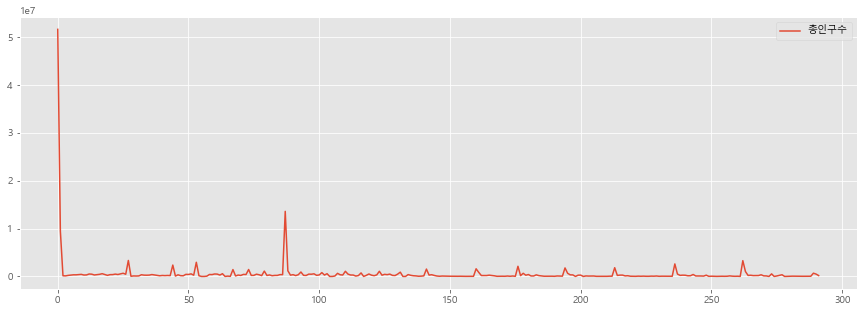

In [182]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
import numpy as np
plt.style.use('ggplot')

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (15, 5)

# 시도별 총인구수 그래프 그리기
popul[['시도', '총인구수']].plot()
plt.show()

In [183]:
# 시도별 합계 인구수 정보만 사용하여 그래프 그리기
popul_sido = popul.loc[popul['군구'] == '소계']
popul_sido = popul_sido.drop(popul_sido.index[0])
popul_sido = popul_sido[['시도', '총인구수', '남자인구수', '여자인구수']]
popul_sido = popul_sido.set_index(['시도'])
display(popul_sido)

,총인구수,남자인구수,여자인구수
시도,,,
서울특별시,9494807,4605655,4889152
부산광역시,3336737,1630944,1705793
대구광역시,2375306,1169571,1205735
인천광역시,2957066,1480432,1476634
광주광역시,1435378,709685,725693
대전광역시,1448401,722517,725884
울산광역시,1115609,573152,542457
세종특별자치시,380215,189723,190492
경기도,13585967,6838396,6747571


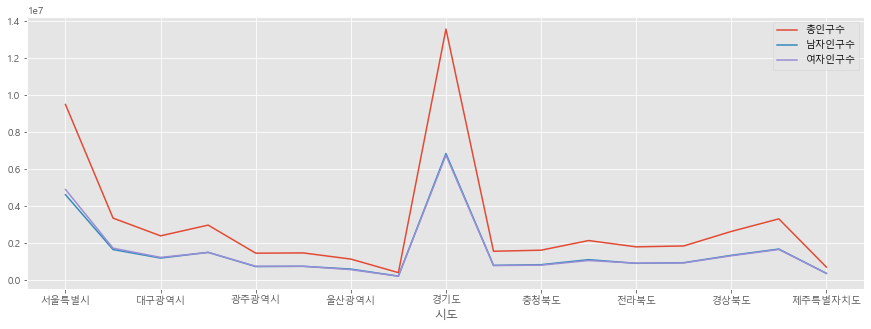

In [184]:
# 시도별 인구수 그래프 그리기
popul_sido.plot()
plt.show()

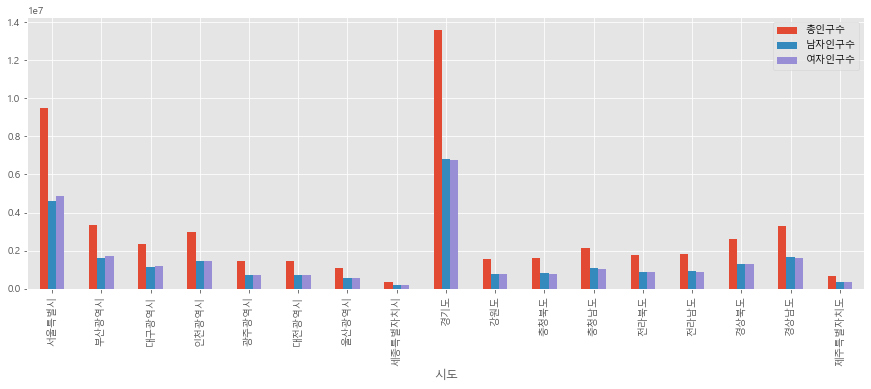

In [185]:
# 막대 그래프로 그리기
popul_sido.plot(kind = 'bar', rot = 90)
plt.show()

### 샘플 문제 (2)

* 문제 : 우리나라의 행정구역별 인구수 대비 공공보건 의료기관 수는 얼마나 될까?

1. 데이터 수집
  - 보건복지부_공공보건 의료기관 현황 데이터  
  - 공공데이터포털 [링크](https://www.data.go.kr/data/15004305/fileData.do)
  

2. csv 데이터를 DataFrame 으로 가져오기


3. 데이터 전처리

In [186]:
# pandas error, warning 무시 옵션 설정
# pd.set_option('mode.chained_assignment', None)

# .csv 파일 가져오기
data = pd.read_csv('./20161231.csv', index_col=0, encoding='cp949', engine='python')

# data 객체의 상위 다섯 개 행의 데이터 출력
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [187]:
# 주소에서 시도, 군구 정보 분리
# apply() 함수는 데이터프레임의 행 또는 열 또는 전체 셀에 원하는 연산
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))

addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [188]:
# 시도 이름에서 잘못된 내용이 있는지 확인하기 위해 시도 이름의 유일한 값을 출력하여 확인함
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [189]:
# 시도가 아닌 군구에 해당하는 정보를 수정하기
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [190]:
# .iloc[] 데이터프레임의 행이나 컬럼의 인덱스 값으로 접근
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [191]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [192]:
addr.iloc[31]

시도    경상남도
군구     창원시
Name: 31, dtype: object

In [193]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [194]:
addr.iloc[47] = ['경상북도', '경산시']

In [195]:
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [196]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [197]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [198]:
addr.iloc[209]

시도    충청남도
군구     천안시
Name: 209, dtype: object

In [199]:
addr.iloc[210]

시도    충청남도
군구     천안시
Name: 210, dtype: object

In [200]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [201]:
# 축약된 이름을 정확한 이름으로 변경하기
# 딕셔너리로 만들어서 키에 해당하는 값을 가져오기
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [202]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [203]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [204]:
addr.iloc[75] = ['제주특별자치도', '제주시']

In [205]:
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [206]:
# 행정구역별 공공보건의료기관 수 구하기
# 행 단위로 집계하기 위해 axis = 1 로 설정
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [207]:
# count 열 만들기
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [208]:
# groupby 로 지역 그룹별 집계내기
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [209]:
# 인덱스를 시도군구로 변경
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [210]:
# 시도군구 컬럼 만들기
popul['시도군구'] = popul.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

popul.head()

,시도,군구,총인구수,남자인구수,여자인구수,시도군구
0,전국,소계,51578178,25711784,25866394,전국 소계
1,서울특별시,소계,9494807,4605655,4889152,서울특별시 소계
2,서울특별시,종로구,143624,69513,74111,서울특별시 종로구
3,서울특별시,중구,122088,59364,62724,서울특별시 중구
4,서울특별시,용산구,222263,106743,115520,서울특별시 용산구


In [211]:
# 컬럼값이 '소계'인 행은 제외
popul = popul[popul.군구 != '소계']

# 시도군구를 인덱스로 설정
popul = popul.set_index("시도군구")
popul.head()

,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,143624,69513,74111
서울특별시 중구,서울특별시,중구,122088,59364,62724
서울특별시 용산구,서울특별시,용산구,222263,106743,115520
서울특별시 성동구,서울특별시,성동구,283821,138162,145659
서울특별시 광진구,서울특별시,광진구,339893,163920,175973


In [212]:
# 시도군구별 병원 수와 시도군구별 인구수 데이터 병합
# join, 양쪽 객체 모두가 공통으로 갖는 인덱스를 기준으로 가져옴
addr_popul_merge = pd.merge(addr_group, popul, how='inner', left_index=True, right_index=True)
addr_popul_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,212277,105308,106969
강원도 동해시,강원도,동해시,1,강원도,동해시,89574,45553,44021
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,64165,32450,31715
강원도 속초시,강원도,속초시,1,강원도,속초시,82848,41100,41748
강원도 양구군,강원도,양구군,1,강원도,양구군,21607,11327,10280


In [213]:
# 필요한 컬럼만 추출
local_MC_Popul = addr_popul_merge[['시도_x', '군구_x', 'count', '총인구수']]
local_MC_Popul.head()

,시도_x,군구_x,count,총인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,212277
강원도 동해시,강원도,동해시,1,89574
강원도 삼척시,강원도,삼척시,1,64165
강원도 속초시,강원도,속초시,1,82848
강원도 양구군,강원도,양구군,1,21607


In [214]:
# 컬럼 이름 변경
local_MC_Popul = local_MC_Popul.rename(columns = {'시도_x':'시도', '군구_x':'군구', '총인구수':'인구수'})

# 인구수 대비 공공보건의료기관 비율 계산
MC_count = local_MC_Popul['count']
MC_count.head()
# axis = 0 은 행을 기준으로 레이블을 나눔
local_MC_Popul['MC_ratio'] = MC_count.div(local_MC_Popul['인구수'], axis = 0) * 100000

local_MC_Popul.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,212277,1.88433
강원도 동해시,강원도,동해시,1,89574,1.11640
강원도 삼척시,강원도,삼척시,1,64165,1.55848
강원도 속초시,강원도,속초시,1,82848,1.20703
강원도 양구군,강원도,양구군,1,21607,4.62813


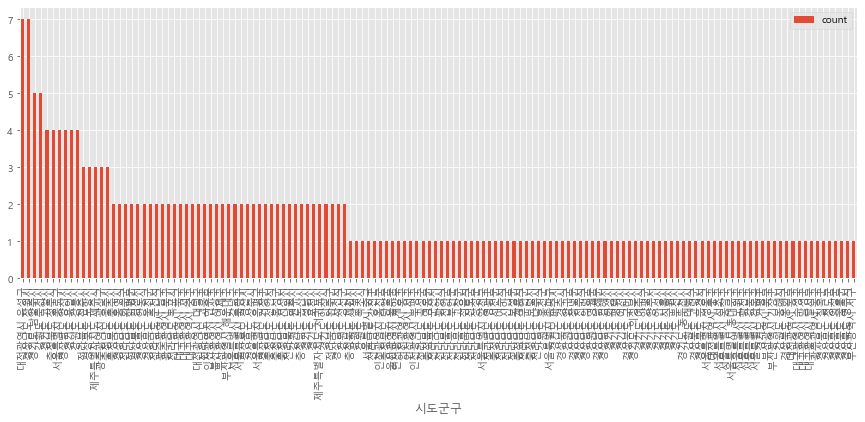

In [215]:
# 바 차트 그리기
MC_ratio = local_MC_Popul[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
MC_ratio.plot(kind='bar', rot = 90)
plt.show()

### 더 생각해보기

* 행정구역별 데이터(인구수, 기관수 등)를 활용해서 어떤 정보를 파악할 수 있을까?, 어떤 문제를 해결할 수 있을까?